## 9/11: Probability Distributions: Binomial Case Study  
Isabella Turco  
Quantitative Neuro Core

In [20]:
import random as rnd
import numpy as np 
import collections 
import matplotlib.pyplot as plt 
import time 

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion
from scipy.optimize import curve_fit, minimize

### Binomial Distribution

#### Exercise 1

Probability of Each Quantal Event:  [1.07374182e-01 2.68435456e-01 3.01989888e-01 2.01326592e-01
 8.80803840e-02 2.64241152e-02 5.50502400e-03 7.86432000e-04
 7.37280000e-05 4.09600000e-06 1.02400000e-07]


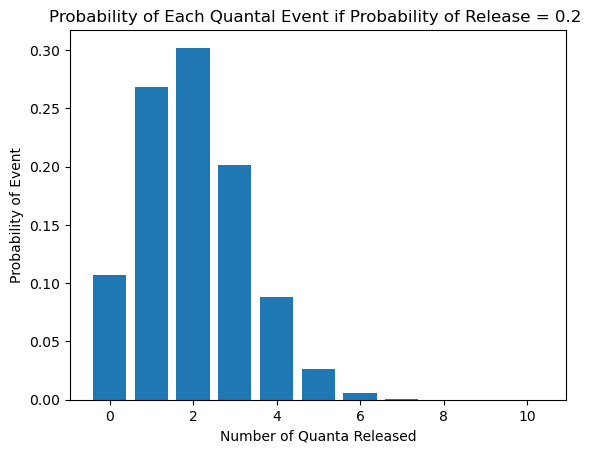

In [2]:
n_quanta = 10 
p_release = 0.2
possible_events = np.arange(0,11,1)
p_each_event = binom.pmf(possible_events, n_quanta, p_release)
print("Probability of Each Quantal Event: ", p_each_event)
plt.bar(possible_events, p_each_event)
plt.xlabel("Number of Quanta Released")
plt.ylabel("Probability of Event")
plt.title(f"Probability of Each Quantal Event if Probability of Release = {p_release} ")
plt.show()

#### Exercise 2

In [13]:
total_quanta = 14
measured_n2_quanta = 8
all_p_release = np.linspace(0,1,11)
p_8_quanta = binom.pmf(measured_n2_quanta, total_quanta, all_p_release)
print(f"Probability of 8 Quanta Released if Release Probability = {all_p_release[1]}: {p_8_quanta[1]}")
print(f"Probability of 8 Quanta Released if Release Probability = {all_p_release[7]}: {p_8_quanta[7]}")
print(p_8_quanta)
print(f"Maximum = {max(p_8_quanta)}")
all_p_release_higher_res = np.linspace(0,1,22)
p_8_quanta_higher_res = binom.pmf(measured_n2_quanta, 1, all_p_release_higher_res)

Probability of 8 Quanta Released if Release Probability = 0.1: 1.5959173230000027e-05
Probability of 8 Quanta Released if Release Probability = 0.7000000000000001: 0.12620227406786966
[0.00000000e+00 1.59591732e-05 2.01527919e-03 2.31800095e-02
 9.18211579e-02 1.83288574e-01 2.06597605e-01 1.26202274e-01
 3.22444670e-02 1.29269303e-03 0.00000000e+00]
Maximum = 0.20659760529408008


#### Exercise 3

In [14]:
measured_n3_quanta = 5
theoretical_p_release = 0.1 
p_5_quanta_1 = binom.pmf(measured_n3_quanta, total_quanta, theoretical_p_release)
total_likelihood = p_8_quanta[7] * p_5_quanta_1
print(f"Total Likelihood = {total_likelihood}")
log_likelihood = np.log(p_8_quanta[7]) + np.log(p_5_quanta_1)
print(f"Log Likelihood = {log_likelihood}")

p_5_quanta = binom.pmf(measured_n3_quanta, total_quanta, all_p_release)
total_likelihood_all = p_8_quanta * p_5_quanta
print(f"Total Likelihood = {total_likelihood_all}")
log_likelihood_all = np.log(p_8_quanta) + np.log(p_5_quanta)
print(f"Log Likelihood = {log_likelihood_all}")

Total Likelihood = 0.0009788448015803685
Log Likelihood = -6.929137455497646
Total Likelihood = [0.00000000e+00 1.23781872e-07 1.73284275e-04 4.55057542e-03
 1.89700313e-02 2.23964676e-02 8.43112504e-03 8.35819976e-04
 1.08302672e-05 1.52817126e-09 0.00000000e+00]
Log Likelihood = [        -inf -15.90474492  -8.6605771   -5.39250159  -3.96489484
  -3.79885203  -4.77582506  -7.08709731 -11.43316583 -20.29919407
         -inf]


/var/folders/c4/ps_jx2k53xbby28653g_4lqc0000gp/T/ipykernel_63990/281536385.py:12: RuntimeWarning: divide by zero encountered in log
  log_likelihood_all = np.log(p_8_quanta) + np.log(p_5_quanta)


#### Exercise 4

Alll Likelihoods: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Maximum Likelihood = 0.0, Probability = 0.0


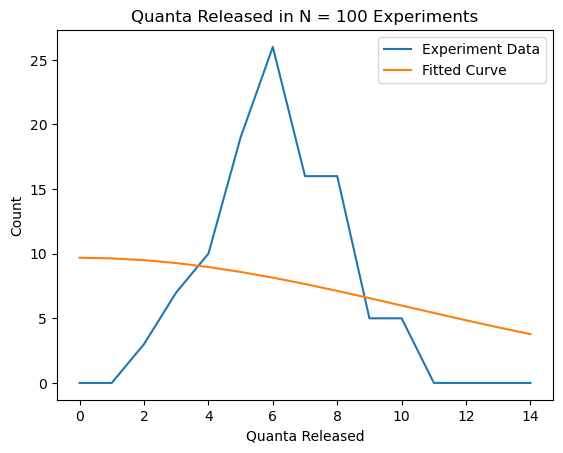

Estimated release probability (p-hat) is 0.50


/var/folders/c4/ps_jx2k53xbby28653g_4lqc0000gp/T/ipykernel_63990/560840904.py:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum([measured_releases[k] * np.log(binom.pmf(measured_releases, release_counts, p)) for k in range(len(release_counts)) if release_counts[k] > 0])
/Users/iturco/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [21]:
measured_releases = np.arange(0,15,1)
release_counts = [0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0]

plt.plot(measured_releases, release_counts, label = "Experiment Data")
plt.xlabel("Quanta Released")
plt.ylabel("Count")

def calculate_likelihood(p):
    likelihood = 1.0 
    for release_event, release_count in zip(measured_releases, release_counts):
        likelihood *= binom.pmf(release_event, release_count, p) ** release_count
    return likelihood

likelihoods = [calculate_likelihood(p) for p in all_p_release]
print(f"Alll Likelihoods: {likelihoods}")
maximum_likelihood = max(likelihoods)
maximum_likelihood_probability = all_p_release[np.argmax(likelihoods)]

print(f"Maximum Likelihood = {maximum_likelihood}, Probability = {maximum_likelihood_probability}")

def gaussian(x, A, B):
    y = A * np.exp(-1 * B * x**2)
    return y

parameters, covariance = curve_fit(gaussian, measured_releases, release_counts)
fitted_curve = gaussian(measured_releases, parameters[0], parameters[1])

plt.plot(measured_releases, fitted_curve, label = "Fitted Curve")
plt.title("Quanta Released in N = 100 Experiments")
plt.legend()
plt.show()

def negative_log_likelihood(p):
    return -np.sum([measured_releases[k] * np.log(binom.pmf(measured_releases, release_counts, p)) for k in range(len(release_counts)) if release_counts[k] > 0])

# Perform optimization
result = minimize(negative_log_likelihood, x0=0.5, bounds=[(0.01, 1.0)])

# Extract the estimated probability
p_hat = result.x[0]
print(f"Estimated release probability (p-hat) is {p_hat:.2f}")



#### Exercise 5

In [22]:
true_p_release = 0.3
measured_n5_quanta = 7 

new_probability = binom.pmf(measured_n5_quanta, total_quanta, true_p_release)

print(f"Probability of 7 Quanta Released if Release Probability = {true_p_release}: {new_probability}")


Probability of 7 Quanta Released if Release Probability = 0.3: 0.06181335872712


#### Bonus Exercise